# 1 - Data Preprocessing

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.1 - Reading Data & Gathering info about it 


In [102]:
df=pd.read_csv("C:\courses\AI & ML\Supervised ML\\task\-Predicting-Loan-Approval--using-Logistic-Regression-and-Decision-Trees-\data.csv") 

In [103]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [105]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [106]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

# 1.2 - Feature Extraction


In [107]:
df['TotalIncome']=df.ApplicantIncome+df.CoapplicantIncome

In [108]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [109]:
df=df.drop_duplicates()

In [110]:
df=df.drop(columns=['ApplicantIncome','CoapplicantIncome'],axis=1)

In [111]:
df2=df.copy()

In [112]:
df2=df2.drop(columns='Loan_ID',axis=1)

In [113]:
df[df.Loan_Amount_Term!=360]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
14,LP001030,Male,Yes,2,Graduate,No,17.0,120.0,1.0,Urban,Y,2385.0
16,LP001034,Male,No,1,Not Graduate,No,100.0,240.0,NaN,Urban,Y,3596.0
19,LP001041,Male,Yes,0,Graduate,NaN,115.0,NaN,1.0,Urban,Y,6100.0
36,LP001109,Male,Yes,0,Graduate,No,100.0,NaN,0.0,Urban,N,3158.0
44,LP001136,Male,Yes,0,Not Graduate,Yes,96.0,NaN,1.0,Urban,Y,4695.0
...,...,...,...,...,...,...,...,...,...,...,...,...
591,LP002931,Male,Yes,2,Graduate,Yes,205.0,240.0,1.0,Semiurban,N,6000.0
593,LP002936,Male,Yes,0,Graduate,No,142.0,180.0,1.0,Rural,Y,7159.0
600,LP002949,Female,No,3+,Graduate,NaN,350.0,180.0,NaN,Urban,N,42083.0
605,LP002960,Male,Yes,0,Not Graduate,No,NaN,180.0,1.0,Urban,N,6200.0


# 1.3 Outlier Detection

In [114]:
from datasist.structdata import detect_outliers
dirty_cols =df2.select_dtypes(['int64','float64'])
dirty_idx=detect_outliers(data=df2,n=0,features=dirty_cols)
df2.drop(dirty_idx,inplace=True)

# 1.4 - Handling Missing values

In [115]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='mean')
dirty_cols=dirty_cols.columns
df2[dirty_cols]=imputer.fit_transform(df2[dirty_cols])

In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            554 non-null    object 
 1   Married           561 non-null    object 
 2   Dependents        550 non-null    object 
 3   Education         564 non-null    object 
 4   Self_Employed     535 non-null    object 
 5   LoanAmount        564 non-null    float64
 6   Loan_Amount_Term  564 non-null    float64
 7   Credit_History    564 non-null    float64
 8   Property_Area     564 non-null    object 
 9   Loan_Status       564 non-null    object 
 10  TotalIncome       564 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [117]:
imputer=SimpleImputer(strategy="most_frequent")
dirty_cols=df2.select_dtypes(['object'])
dirty_cols=dirty_cols.columns
df2[dirty_cols]=imputer.fit_transform(df2[dirty_cols])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            564 non-null    object 
 1   Married           564 non-null    object 
 2   Dependents        564 non-null    object 
 3   Education         564 non-null    object 
 4   Self_Employed     564 non-null    object 
 5   LoanAmount        564 non-null    float64
 6   Loan_Amount_Term  564 non-null    float64
 7   Credit_History    564 non-null    float64
 8   Property_Area     564 non-null    object 
 9   Loan_Status       564 non-null    object 
 10  TotalIncome       564 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [118]:
df2.reset_index(inplace=True)

# 1.5 - Encoding Categorial Data

In [119]:
df2=pd.get_dummies(data=df2,columns=dirty_cols,drop_first=True)

In [120]:
df2.sample(5)

,index,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
501,546,80.0,36.0,1.000000,3358.0,True,False,False,False,False,True,False,True,False,False
251,268,135.0,360.0,1.000000,3418.0,False,False,False,False,False,False,False,False,False,False
370,398,109.0,360.0,1.000000,5568.0,True,False,False,False,False,True,False,False,False,True
457,497,111.0,12.0,0.843629,7482.0,True,True,False,False,False,False,False,False,True,True
393,425,121.0,360.0,1.000000,6966.0,True,True,False,False,False,False,False,False,False,True


In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    564 non-null    int64  
 1   LoanAmount               564 non-null    float64
 2   Loan_Amount_Term         564 non-null    float64
 3   Credit_History           564 non-null    float64
 4   TotalIncome              564 non-null    float64
 5   Gender_Male              564 non-null    bool   
 6   Married_Yes              564 non-null    bool   
 7   Dependents_1             564 non-null    bool   
 8   Dependents_2             564 non-null    bool   
 9   Dependents_3+            564 non-null    bool   
 10  Education_Not Graduate   564 non-null    bool   
 11  Self_Employed_Yes        564 non-null    bool   
 12  Property_Area_Semiurban  564 non-null    bool   
 13  Property_Area_Urban      564 non-null    bool   
 14  Loan_Status_Y            5

In [122]:
bool_cols=df2.select_dtypes(['bool'])

In [123]:
df2[bool_cols.columns]=df2[bool_cols.columns].astype(dtype='int64')

In [124]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    564 non-null    int64  
 1   LoanAmount               564 non-null    float64
 2   Loan_Amount_Term         564 non-null    float64
 3   Credit_History           564 non-null    float64
 4   TotalIncome              564 non-null    float64
 5   Gender_Male              564 non-null    int64  
 6   Married_Yes              564 non-null    int64  
 7   Dependents_1             564 non-null    int64  
 8   Dependents_2             564 non-null    int64  
 9   Dependents_3+            564 non-null    int64  
 10  Education_Not Graduate   564 non-null    int64  
 11  Self_Employed_Yes        564 non-null    int64  
 12  Property_Area_Semiurban  564 non-null    int64  
 13  Property_Area_Urban      564 non-null    int64  
 14  Loan_Status_Y            5

# 1.6 - Feature Scaling

In [125]:
df2.columns

Index(['index', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'TotalIncome', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_Y'],
      dtype='object')

In [126]:
scaling_cols=[ 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'TotalIncome']

In [127]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df2[scaling_cols])

StandardScaler()

In [128]:
df2_scaled=scaler.transform(df2[scaling_cols])

In [129]:
df2_scaled=pd.DataFrame(df2_scaled,columns=scaling_cols,index=df2.index)

In [130]:
df2_scaled.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02
mean,9.921142e-17,-2.362177e-16,3.149569e-17,3.023586e-16
std,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00
min,-2.280441e+00,-5.090994e+00,-2.423667e+00,-1.857759e+00
25%,-6.044319e-01,2.759164e-01,4.492380e-01,-7.293777e-01
50%,-1.163632e-01,2.759164e-01,4.492380e-01,-2.059338e-01
75%,4.637939e-01,2.759164e-01,4.492380e-01,4.850433e-01
max,6.688972e+00,2.126575e+00,4.492380e-01,3.065563e+00


In [131]:
df2[scaling_cols]=df2_scaled

In [132]:
df2.describe()

,index,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
count,564.000000,5.640000e+02,5.640000e+02,5.640000e+02,5.640000e+02,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,303.429078,9.921142e-17,-2.362177e-16,3.149569e-17,3.023586e-16,0.813830,0.648936,0.161348,0.166667,0.074468,0.234043,0.117021,0.384752,0.328014,0.693262
std,178.337956,1.000888e+00,1.000888e+00,1.000888e+00,1.000888e+00,0.389589,0.477727,0.368178,0.373009,0.262764,0.423775,0.321731,0.486968,0.469907,0.461549
min,0.000000,-2.280441e+00,-5.090994e+00,-2.423667e+00,-1.857759e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,149.750000,-6.044319e-01,2.759164e-01,4.492380e-01,-7.293777e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.500000,-1.163632e-01,2.759164e-01,4.492380e-01,-2.059338e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,457.250000,4.637939e-01,2.759164e-01,4.492380e-01,4.850433e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,613.000000,6.688972e+00,2.126575e+00,4.492380e-01,3.065563e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
df2.head()

,index,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,0.000000,0.275916,0.449238,0.096757,1,0,0,0,0,0,0,0,1,1
1,1,-0.088737,0.275916,0.449238,0.204084,1,1,1,0,0,0,0,0,0,0
2,2,-1.230633,0.275916,0.449238,-1.166782,1,1,0,0,0,0,1,0,1,1
3,3,-0.236078,0.275916,0.449238,-0.305944,1,1,0,0,0,1,0,0,1,1
4,4,0.150693,0.275916,0.449238,0.163726,1,0,0,0,0,0,0,0,1,1


In [134]:
df2.drop(columns=['index'],axis=1,inplace=True)

In [135]:
df2.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.000000,0.275916,0.449238,0.096757,1,0,0,0,0,0,0,0,1,1
1,-0.088737,0.275916,0.449238,0.204084,1,1,1,0,0,0,0,0,0,0
2,-1.230633,0.275916,0.449238,-1.166782,1,1,0,0,0,0,1,0,1,1
3,-0.236078,0.275916,0.449238,-0.305944,1,1,0,0,0,1,0,0,1,1
4,0.150693,0.275916,0.449238,0.163726,1,0,0,0,0,0,0,0,1,1


# 1.7 - Test-Train split

In [136]:
from sklearn.model_selection import train_test_split
x=df2.drop('Loan_Status_Y',axis=1)
y=df2['Loan_Status_Y']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

 # 2 - Model Training(without GridSearchCV)

# 2.1 - Training Logistic Regression with different penalties: L1, L2, and ElasticNet.




In [137]:
y_train

141    0
299    0
423    1
465    1
19     0
      ..
71     0
106    1
270    1
435    0
102    1
Name: Loan_Status_Y, Length: 394, dtype: int64

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,precision_score,recall_score
log_reg_l1=LogisticRegression(penalty='l1',solver='liblinear',C=0.1)
log_reg_l2=LogisticRegression(penalty='l2',solver='lbfgs',C=0.1)
log_reg_elastic=LogisticRegression(penalty='elasticnet',solver='saga',C=0.1,l1_ratio=0.5)


In [139]:
log_reg_l1.fit(x_train,y_train)
log_reg_l2.fit(x_train,y_train)
log_reg_elastic.fit(x_train,y_train)

LogisticRegression(C=0.1, l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [140]:
regressions=[log_reg_l1,log_reg_l2,log_reg_elastic]

for reg in regressions:
    y_pred=reg.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    recall_scr=recall_score(y_test,y_pred)
    precision_scr=precision_score(y_test,y_pred)

    print(f"{reg} Penalty results")
    print(f"accuracy_score: {accuracy}")
    print(f"f1_score: {f1}")
    print(f"recall_score: {recall_scr}")
    print(f"precision_score: {precision_scr}")
    print(classification_report(y_test,y_pred))
    print("\n")


LogisticRegression(C=0.1, penalty='l1', solver='liblinear') Penalty results
accuracy_score: 0.7941176470588235
f1_score: 0.8679245283018868
recall_score: 0.9829059829059829
precision_score: 0.777027027027027
              precision    recall  f1-score   support

           0       0.91      0.38      0.53        53
           1       0.78      0.98      0.87       117

    accuracy                           0.79       170
   macro avg       0.84      0.68      0.70       170
weighted avg       0.82      0.79      0.76       170



LogisticRegression(C=0.1) Penalty results
accuracy_score: 0.7941176470588235
f1_score: 0.8679245283018868
recall_score: 0.9829059829059829
precision_score: 0.777027027027027
              precision    recall  f1-score   support

           0       0.91      0.38      0.53        53
           1       0.78      0.98      0.87       117

    accuracy                           0.79       170
   macro avg       0.84      0.68      0.70       170
weighted avg     

 # 2.2 - Train Decision Tree with basic parameters

In [141]:
from sklearn.tree import  DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [142]:
y_pred=tree_clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
recall_scr=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision_scr=precision_score(y_test,y_pred)
print(f"{reg} Penalty results")
print(f"accuracy_score: {accuracy}")
print(f"f1_score: {f1}")
print(f"recall_score: {recall_scr}")
print(f"precision_score: {precision_scr}")
print(classification_report(y_test,y_pred))



LogisticRegression(C=0.1, l1_ratio=0.5, penalty='elasticnet', solver='saga') Penalty results
accuracy_score: 0.7941176470588235
f1_score: 0.7510917030567685
recall_score: 0.7350427350427351
precision_score: 0.7678571428571429
              precision    recall  f1-score   support

           0       0.47      0.51      0.49        53
           1       0.77      0.74      0.75       117

    accuracy                           0.66       170
   macro avg       0.62      0.62      0.62       170
weighted avg       0.67      0.66      0.67       170



# 2.3 Random Forest With no gridsearch

In [143]:
from sklearn.ensemble import RandomForestClassifier


In [144]:
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)


RandomForestClassifier()

In [145]:
y_pred=rf_clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
recall_scr=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
precision_scr=precision_score(y_test,y_pred)
print(f"{reg} Penalty results")
print(f"accuracy_score: {accuracy}")
print(f"f1_score: {f1}")
print(f"recall_score: {recall_scr}")
print(f"precision_score: {precision_scr}")
print(classification_report(y_test,y_pred))

LogisticRegression(C=0.1, l1_ratio=0.5, penalty='elasticnet', solver='saga') Penalty results
accuracy_score: 0.7941176470588235
f1_score: 0.8648648648648649
recall_score: 0.9572649572649573
precision_score: 0.7887323943661971
              precision    recall  f1-score   support

           0       0.82      0.43      0.57        53
           1       0.79      0.96      0.86       117

    accuracy                           0.79       170
   macro avg       0.81      0.70      0.72       170
weighted avg       0.80      0.79      0.77       170



# 3 - Model Training (with GridSearchCV)


## 3.1 - logistic regression with GridSearchCV

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
#import warnings
#warnings.filterwarnings('ignore')

In [148]:
# Create separate parameter grids for different penalties
l1_params = {
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga'],
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'max_iter': [100, 200, 500]
}

l2_params = {
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'max_iter': [100, 200, 500]
}

elasticnet_params = {
    'penalty': ['elasticnet'],
    'solver': ['saga'], 
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': [100, 200, 500]
}

param_grid = [l1_params, l2_params, elasticnet_params]

log_reg = LogisticRegression()
log_reg_cv = GridSearchCV(
    log_reg, param_grid, 
    scoring='accuracy', cv=3, n_jobs=-1, verbose=1
)
log_reg_cv.fit(x_train, y_train)

Fitting 3 folds for each of 165 candidates, totalling 495 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                          'max_iter': [100, 200, 500], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                          'max_iter': [100, 200, 500], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']},
                         {'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                          'l1_ratio': [0.25, 0.5, 0.75],
                          'max_iter': [100, 200, 500],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy', verbose=1)

In [149]:
log_reg_cv.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [150]:
log_reg_cv=LogisticRegression(**log_reg_cv.best_params_)

In [151]:
log_reg_cv.fit(x_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [152]:
y_pred=log_reg_cv.predict(x_test)
accuracy_score(y_test,y_pred)

0.7941176470588235

## 3.2 - Decision tree with GridsearchCV

In [153]:
params = {
    "criterion": ("gini", "entropy"),
    "max_depth": [3, 5, 7, 10, 15, None],
    "min_samples_split": [2, 5, 10, 20, 30],
    "min_samples_leaf": [1, 2, 5, 10, 15],
    "max_features": ["auto", "sqrt", "log2", None],
    "ccp_alpha": [0.0, 0.01, 0.1, 1.0]  # Add cost complexity pruning
}

tree_clf = DecisionTreeClassifier()
tree_clf_cv = GridSearchCV(
    tree_clf, params, 
    n_jobs=-1, verbose=1, 
    scoring="accuracy", cv=5  
)
tree_clf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


c:\Users\mm174\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
6000 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1914 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mm174\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mm174\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\mm174\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [3, 5, 7, 10, 15, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 20, 30]},
             scoring='accuracy', verbose=1)

In [154]:
tree_clf_cv.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 30}

In [155]:
tree_clf_cv=DecisionTreeClassifier(**tree_clf_cv.best_params_)
tree_clf_cv.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=7, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=30)

In [156]:
y_pred=tree_clf_cv.predict(x_test)
accuracy_score(y_test,y_pred)

0.7941176470588235

# 3.3 - Random forest with grid search

In [157]:
n_estimators = [200,400, 600,800,1000,1200,1400,1700,2000]
max_depth = [2, 3, 5,10]
max_depth.append(None)
min_samples_split = [2, 5,20]
min_samples_leaf = [1, 2, 4,10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf_cv = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(x_train, y_train)
best_params = rf_cv.best_params_

rf_clf_cv = RandomForestClassifier(**best_params)
rf_clf_cv.fit(x_train, y_train)


Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


RandomForestClassifier(max_depth=2, n_estimators=800)

# Visualization and Comparison

In [158]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix

In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [162]:
acc_list={}
acc_list_training_data={}
models={log_reg_l1:"Logistic Regression [L1]",log_reg_l2:"Logistic Regression [L2]",log_reg_elastic:"Logistic Regression [Elasticnet]",tree_clf:"Decision tree",rf_clf:"Random forest ",log_reg_cv:"Logistic Regression",tree_clf_cv:"Decision tree (CV)",rf_clf_cv:"Random forest (CV)"}
for model in models.keys():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_list[models[model]]=acc
    y_pred=model.predict(x_train)
    acc=accuracy_score(y_train,y_pred)
    acc_list_training_data[models[model]]=acc



In [165]:
for model in models.keys():
    print(f"--------------Score of {models[model]}---------------------")
    print_score(model,x_train,y_train,x_test,y_test,train=True)
    print_score(model,x_train,y_train,x_test,y_test,train=False)


--------------Score of Logistic Regression [L1]---------------------
Train Result:
Accuracy Score: 82.49%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.932203    0.805970  0.824873    0.869087      0.844417
recall       0.458333    0.985401  0.824873    0.721867      0.824873
f1-score     0.614525    0.886700  0.824873    0.750612      0.803804
support    120.000000  274.000000  0.824873  394.000000    394.000000
_______________________________________________
Confusion Matrix: 
 [[ 55  65]
 [  4 270]]

Test Result:
Accuracy Score: 79.41%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.909091    0.777027  0.794118    0.843059      0.818200
recall      0.377358    0.982906  0.794118    0.680132      0.794118
f1-score    0.533333    0.867925  0.794118    0.700629      0.76361

(0.65, 1.0)

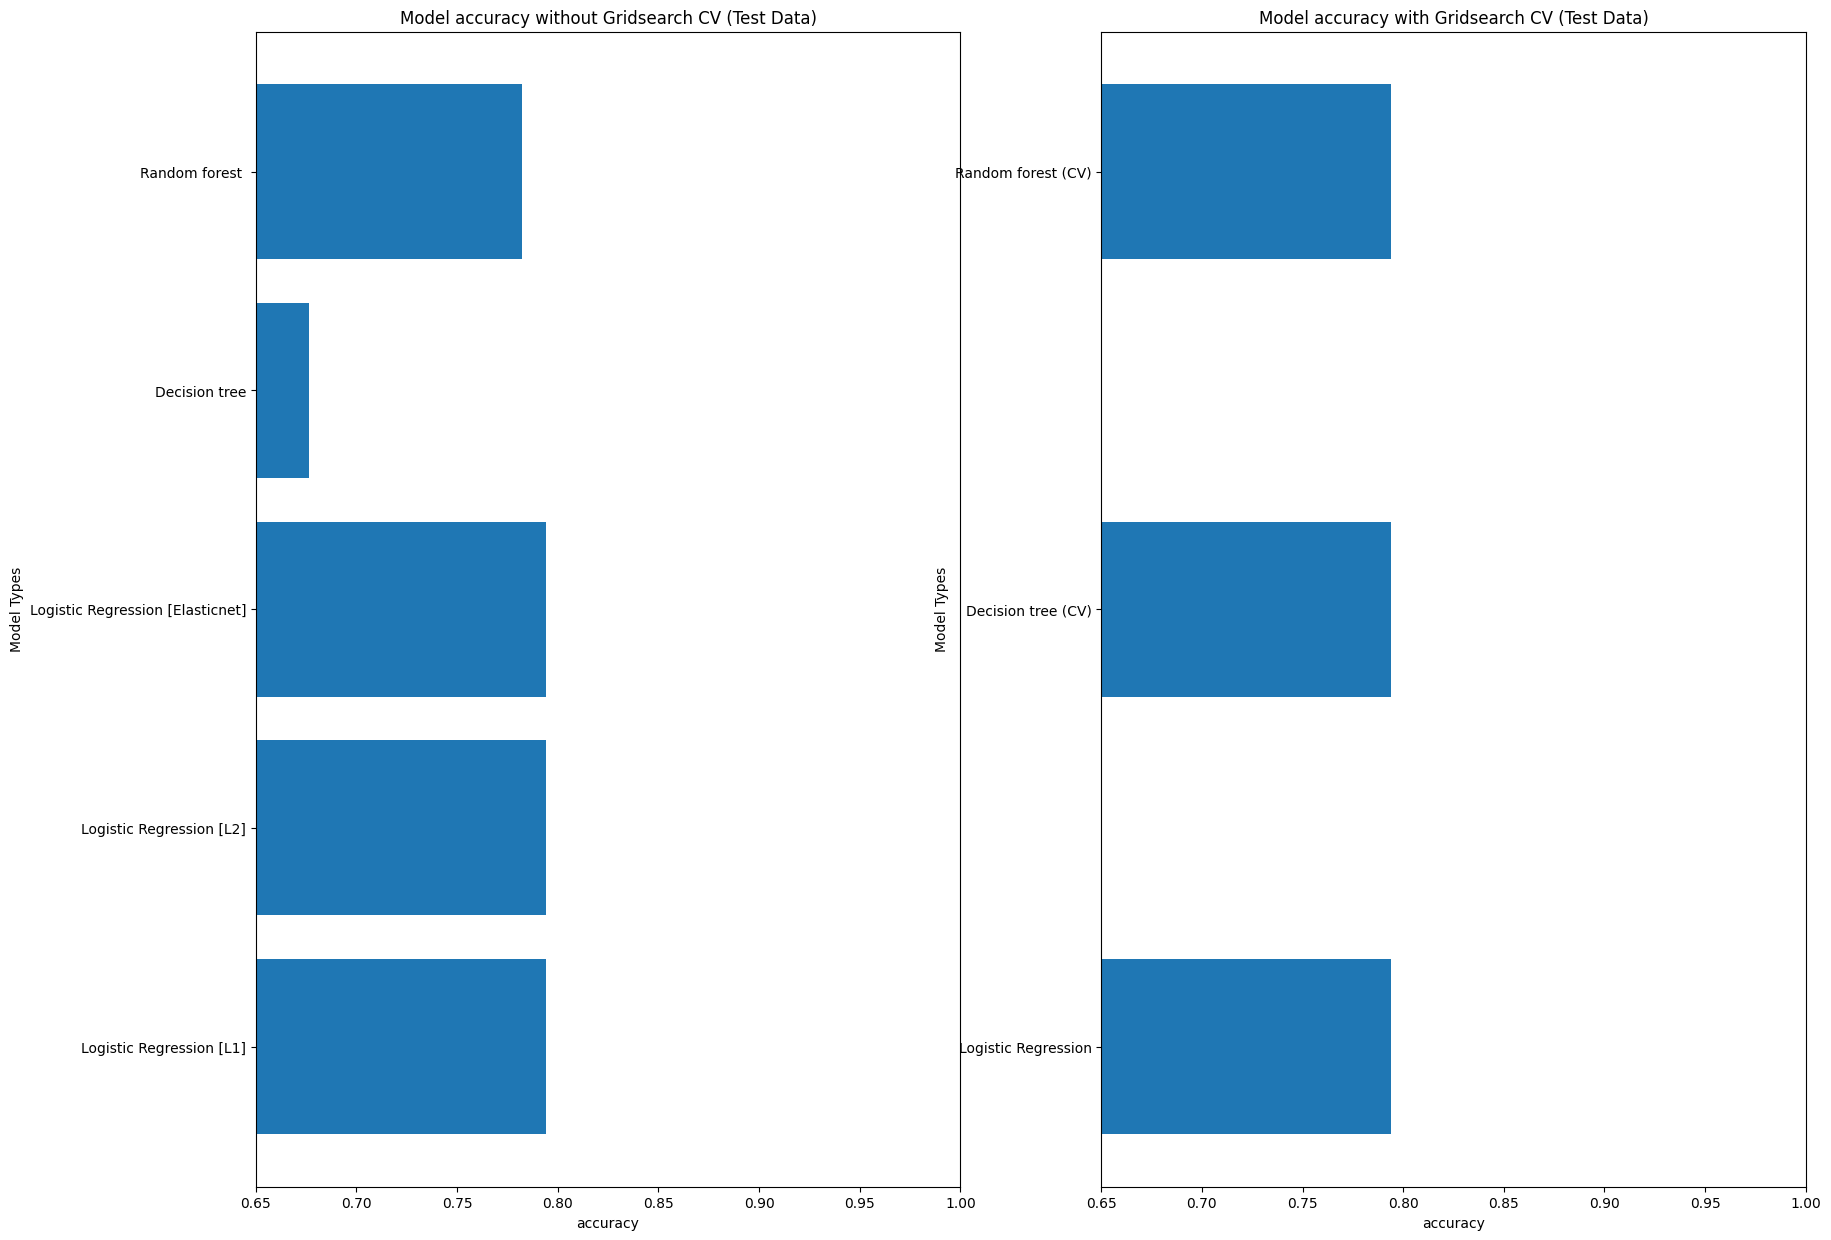

In [166]:
fig ,ax=plt.subplots(ncols=2,nrows=1,figsize=(20,15))
model_names = list(acc_list.keys())[:5]
model_scores = list(acc_list.values())[:5]

ax[0].set_ylabel("Model Types")
ax[0].set_xlabel("accuracy")
ax[0].barh(model_names,model_scores)
ax[0].set_title("Model accuracy without Gridsearch CV (Test Data)")
ax[0].set_xlim(0.65,1)

model_names_cv = list(acc_list.keys())[5:]
model_scores_cv = list(acc_list.values())[5:]


ax[1].set_ylabel("Model Types")
ax[1].set_xlabel("accuracy")
ax[1].barh(model_names_cv,model_scores_cv,height=0.4)
ax[1].set_title("Model accuracy with Gridsearch CV (Test Data)")
ax[1].set_xlim(0.65,1)



(0.65, 1.0)

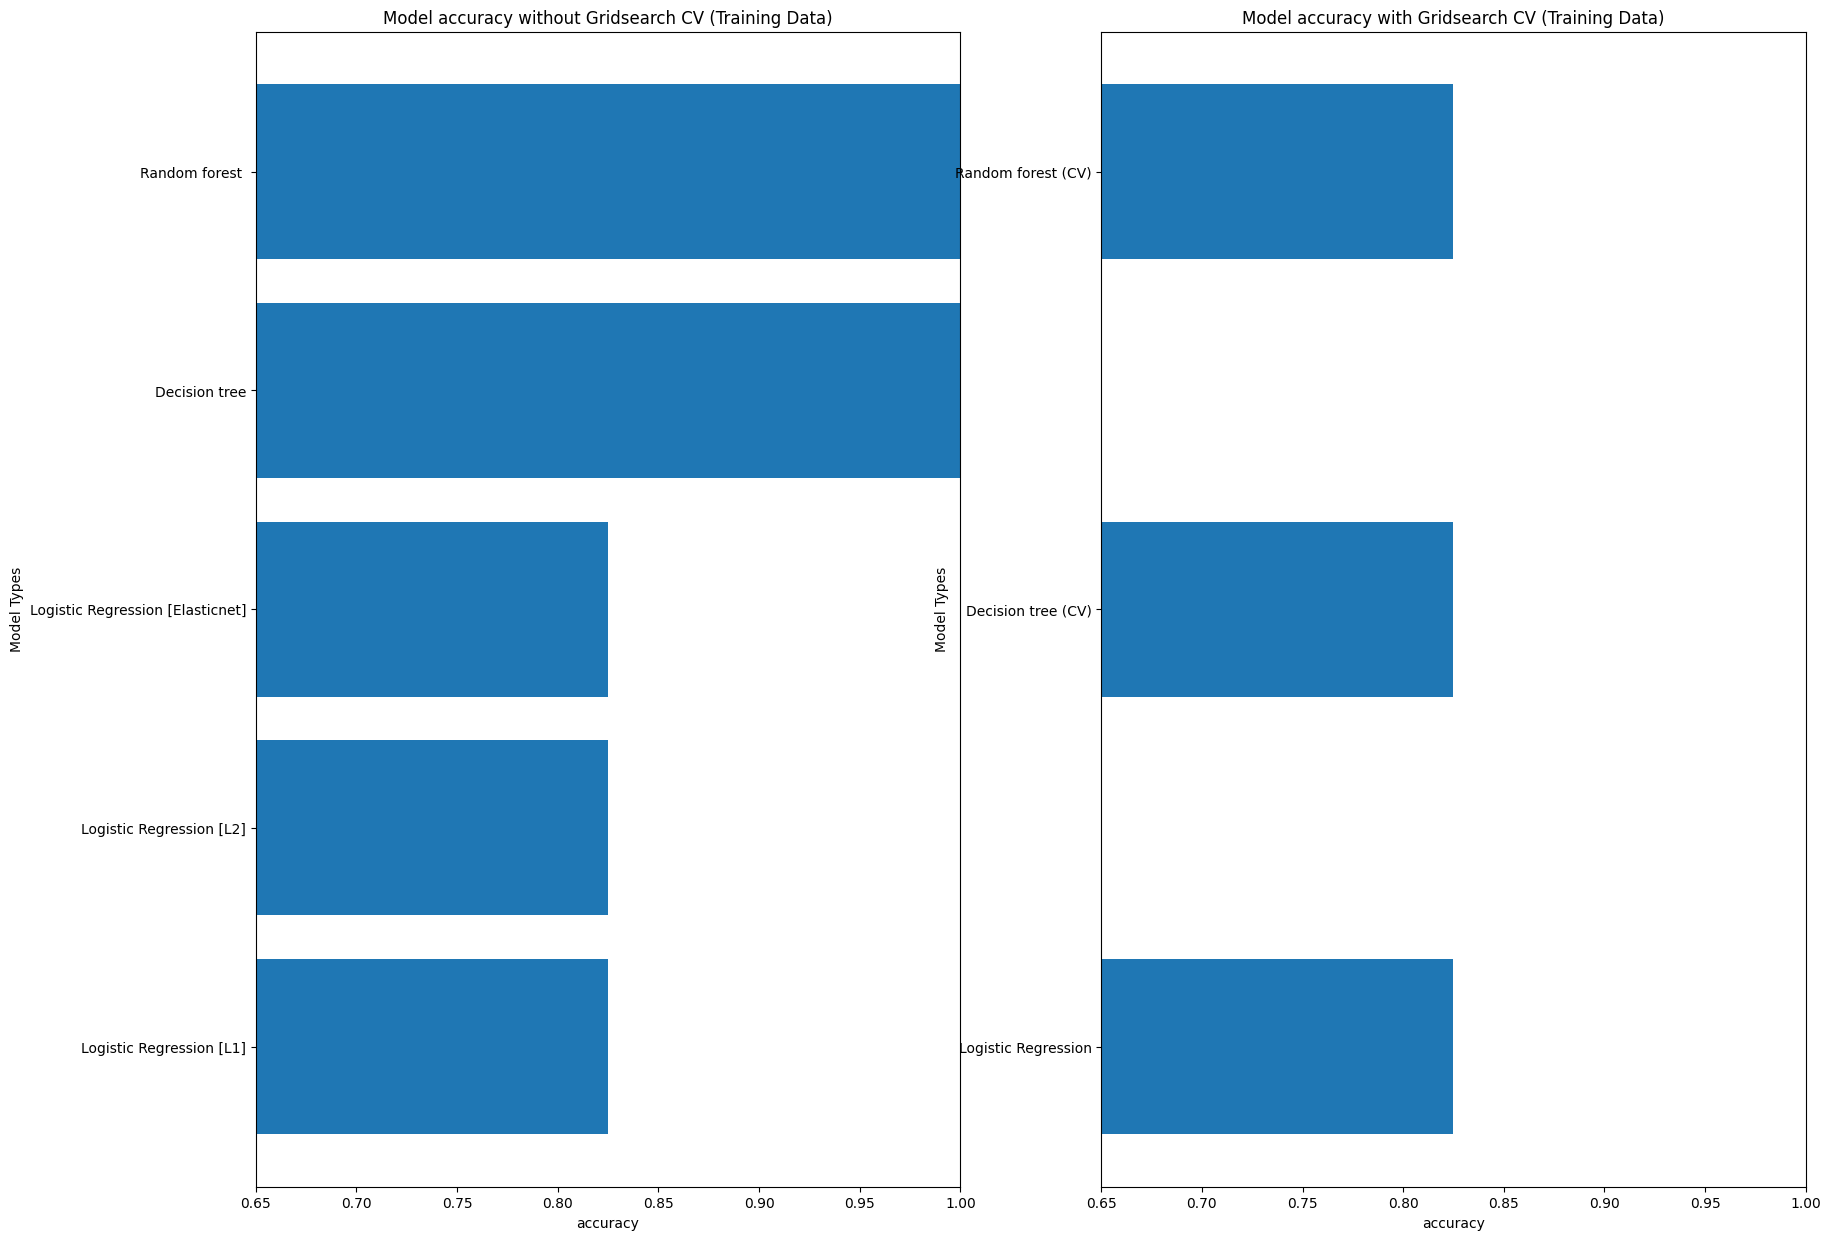

In [167]:
fig ,ax=plt.subplots(ncols=2,nrows=1,figsize=(20,15))

model_names = list(acc_list_training_data.keys())[:5]
model_scores = list(acc_list_training_data.values())[:5]
ax[0].set_ylabel("Model Types")
ax[0].set_xlabel("accuracy")
ax[0].barh(model_names,model_scores)
ax[0].set_title("Model accuracy without Gridsearch CV (Training Data)")
ax[0].set_xlim(0.65,1)

model_names_cv = list(acc_list_training_data.keys())[5:]
model_scores_cv = list(acc_list_training_data.values())[5:]


ax[1].set_ylabel("Model Types")
ax[1].set_xlabel("accuracy")
ax[1].barh(model_names_cv,model_scores_cv,height=0.4)
ax[1].set_title("Model accuracy with Gridsearch CV (Training Data)")
ax[1].set_xlim(0.65,1)
